# Test SleepScoreLab hypothesis on Cecaj activity and sleep data
* SleepScoreLabs published the finding that 30 minutes of exercise correlates with 14 extra minutes of sleep per night
    (http://www.pcalp.com/wp-content/uploads/2017/01/Sleep-Score-Labs-Survey-Release.pdf)
* To test this correlation

    1) calculate to mean sleep time on days with less than x minutes exercice
    
    2) calculate the mean sleep time on days with x+ minutes intense exercice
    
    3)Summarize result in df
        * minutes of intens activity limit for a particular day
        
        * activity difference on average between days above and below the limit
        
        * sleep difference on average between days above and below the limit

    
    4) compare these numbers, if they show a difference close to 14 minutes more sleep per night after 30 minutes exercice per day

In [1261]:
######## config section ########
# specify input files
activity_data_file = "OneYearFitBitDataEdited.csv"
sleep_data_file = "OneYearFitBitDataSleep.csv"

#specify parameters
minutes_frontier = list(range(15,60)) # minutes limit of minutes_intense_activity to seperate between high and low activity days 

# specify output path

In [1262]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [1263]:
def main():
    activity_data, sleep_data = data_import()
    df_activity_sleep_dif = pd.DataFrame(columns=['minutes_intense_activity_frontier', 'activity_difference', \
                                                  'sleep_difference', 'data_points_less_active', \
                                                  'data_points_more_active'])
    for minute in minutes_frontier:
        #print('minutes frontier: ' + str(minute))
        less_active_mean , more_active_mean , sleep_less_active_mean, slee_more_active_mean, df_activity_sleep_dif,\
        less_active, more_active = \
        get_means(activity_data, sleep_data, minute,df_activity_sleep_dif)
        df_activity_sleep_dif = calculate_activity_sleep_correlation(less_active_mean ,more_active_mean , 
                                                                       sleep_less_active_mean,  
                                                                       slee_more_active_mean, 
                                                                       minute, df_activity_sleep_dif, less_active, 
                                                                       more_active)
    plot_diffs(df_activity_sleep_dif)    
    display(df_activity_sleep_dif)
        
        
    return

In [1264]:
#imports the data and shows the first rows
def data_import(): 
    activity_data = pd.read_csv(activity_data_file, sep = ',')
    numeric_ID = pd.DataFrame({'numeric_ID' : range(0,len(activity_data)) }) 
    activity_data = pd.concat([numeric_ID, activity_data], axis=1)
    sleep_data = pd.read_csv(sleep_data_file , sep = ',')
    sleep_data = pd.concat([numeric_ID, sleep_data], axis=1)
    #display(activity_data.tail())
    #display(sleep_data.tail())
   

    return activity_data, sleep_data 
    #solve path problem https://dmorgan.info/posts/argparse-intro/ and delete files from the scripts folder

In [1265]:
def get_means(activity_data, sleep_data, minute,df_activity_sleep_dif):
    
    ### activity data
    less_active = activity_data[activity_data.minutes_intense_activity < minute]
    more_active = activity_data[activity_data.minutes_intense_activity >= minute]
    
    less_active_mean = less_active.mean(axis=0)
    more_active_mean = more_active.mean(axis=0)
    #print(less_active_mean, more_active_mean)
    
    
    ### sleep data sliced based on activity data
    less_active_IDs = pd.DataFrame(less_active.numeric_ID, columns=['numeric_ID'])
    sleep_less_active = pd.merge(sleep_data, less_active_IDs, how='inner', on=['numeric_ID'])
    
    
    more_active_IDs = pd.DataFrame(more_active.numeric_ID, columns=['numeric_ID'])
    sleep_more_active = pd.merge(sleep_data, more_active_IDs, how='inner', on=['numeric_ID'])
    
    
    sleep_less_active_mean = sleep_less_active.mean(axis=0)
    slee_more_active_mean = sleep_more_active.mean(axis=0)
    
    #print(less_active_mean, more_active_mean, sleep_less_active_mean, slee_more_active_mean)
    
    
    
    return less_active_mean , more_active_mean , sleep_less_active_mean, slee_more_active_mean, df_activity_sleep_dif, \
           less_active, more_active

In [1266]:
def calculate_activity_sleep_correlation(less_active_mean , more_active_mean , sleep_less_active_mean, \
                                         sleep_more_active_mean, minute, df_activity_sleep_dif, less_active, more_active):
    activity_dif = more_active_mean.minutes_intense_activity - less_active_mean.minutes_intense_activity
    '''print('minute difference between average of intensive activity over and under ' + str(minute)\
          + ' minutes a day = ' \
          + str(round(activity_dif)))'''
    
    sleep_dif = sleep_more_active_mean.MinutesOfSleep - sleep_less_active_mean.MinutesOfSleep
    '''print('minute difference between average of sleep time on days with intensive activity over and under ' \
          + str(minute) + ' minutes a day = ' \
          + str(round(sleep_dif)))'''
    
    df_activity_sleep_dif = df_activity_sleep_dif.append(pd.Series([minute,activity_dif, sleep_dif, len(less_active), len(more_active)], 
                                                                       index=['minutes_intense_activity_frontier',\
                                                                              'activity_difference', \
                                                                              'sleep_difference', \
                                                                              'data_points_less_active',\
                                                                              'data_points_more_active']),\
                                                          ignore_index=True)
    
    return df_activity_sleep_dif

In [1267]:
def plot_diffs(df_activity_sleep_dif):
    %matplotlib inline 
    relation_plot = df_activity_sleep_dif[['minutes_intense_activity_frontier','activity_difference','sleep_difference']]\
    .plot(x='minutes_intense_activity_frontier')
    
    data_points_plot = df_activity_sleep_dif[['data_points_less_active','data_points_more_active','minutes_intense_activity_frontier']]\
    .plot(x='minutes_intense_activity_frontier')
    
    return

,minutes_intense_activity_frontier,activity_difference,sleep_difference,data_points_less_active,data_points_more_active
0,15.0,45.412689,28.554839,113.0,254.0
1,16.0,45.712422,33.203951,119.0,248.0
2,17.0,45.915534,25.373850,123.0,244.0
3,18.0,46.008562,27.757884,125.0,242.0
4,19.0,46.227816,19.634599,130.0,237.0
5,20.0,46.355954,18.287289,133.0,234.0
6,21.0,46.667086,20.522656,140.0,227.0
7,22.0,46.805975,18.269543,143.0,224.0
8,23.0,47.034092,17.312539,148.0,219.0
9,24.0,47.219859,17.439168,152.0,215.0


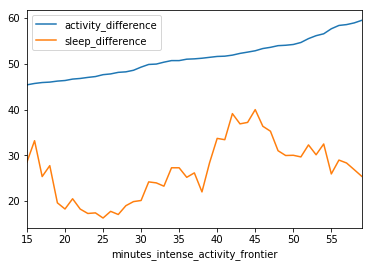

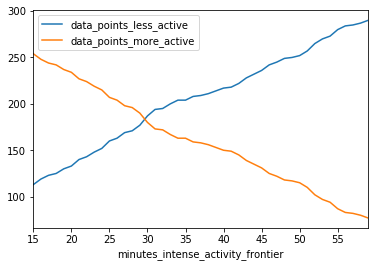

In [1268]:
if __name__ == '__main__':
    main()